# Ridge Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import inv
from math import sqrt

In [2]:
## https://www.kaggle.com/devanshbesain/exploration-and-analysis-auto-mpg/data
df=pd.read_csv("auto-mpg.csv",low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [3]:
df=df[['mpg','weight','acceleration','displacement']]

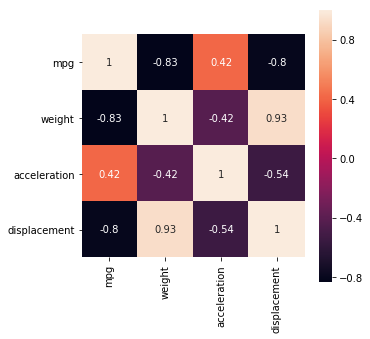

In [4]:
### Correlation between Numerical Features
corr = df.select_dtypes(include=['float64','int64']).iloc[:,0:].corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr,vmax=1, square=True, annot=True)

In [5]:
## Target Variable
df_y=df['mpg']
#df_y

In [6]:
## Independent Variables
df_x=df.drop('mpg', axis=1)
#df_x.head()

# Train-Test Split 

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y, test_size=0.33, random_state=123)

In [8]:
## Converting Dataframe into numpy Array
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train).reshape(len(y_train),1)
y_test=np.array(y_test).reshape(len(y_test),1)
print("x_train={},x_test={},y_train={},y_test={}".format(x_train.shape,x_test.shape,y_train.shape,y_test.shape))

x_train=(266, 3),x_test=(132, 3),y_train=(266, 1),y_test=(132, 1)


In [9]:
## Creating L-2 Penalty
def lamda():
    lamda=np.linspace(stop=1, start=.0001, num=10)
    return lamda
lamda=lamda()

In [10]:
lamda

array([1.000e-04, 1.112e-01, 2.223e-01, 3.334e-01, 4.445e-01, 5.556e-01,
       6.667e-01, 7.778e-01, 8.889e-01, 1.000e+00])

In [11]:
## Ridge Regression
#ones = np.ones(len(x_train))
def ridge_reg(lamda,x_train,y_train):
    ones = np.ones(len(x_train))
    X=np.column_stack((ones,x_train))
    y=y_train
    Xt=np.transpose(X)
    I=np.identity(len(Xt))
    inverse_matrix=np.linalg.inv(np.dot(Xt,X)+lamda*I)
    xy=np.dot(np.transpose(X),y)
    B=np.dot(inverse_matrix,xy)
    return B
#theta=ridge_reg(lamda[0],x_train, y_train)

In [12]:
## RMSE
def rmse(theta):
    n=len(x_train)
    y_pred=theta[0]+theta[1]*x_train[:,0:1]+theta[1]*x_train[:,1:2]+theta[2]*x_train[:,2:3]
    rmse=np.sum(y_train-y_pred)**2
    rmse=1/n*rmse
    rmse=np.sqrt(rmse)
    return rmse
#rmse=rmse(theta)  

In [13]:
## Merging rmse,lambda and ridge Function
rmse_history=[]
lamda_history=[]
coffecient_history=[]
for i in range(len(lamda)):
    theta=ridge_reg(lamda[i],x_train, y_train)
    J=rmse(theta) 
    rmse_history.append(J)
    lamda_history.append(lamda[i])
    coffecient_history.append(theta)
    
    if i%2==0:
        print("lamda={},rmse={},theta={}".format(lamda[i],J,theta))
        

    

lamda=0.0001,rmse=486.22743384359524,theta=[[ 4.11566271e+01]
 [-5.40319912e-03]
 [ 1.46156175e-01]
 [-1.96446149e-02]]
lamda=0.2223,rmse=786.6982988565838,theta=[[ 3.85701035e+01]
 [-5.01108623e-03]
 [ 2.48378950e-01]
 [-2.07021849e-02]]
lamda=0.4445,rmse=1051.5376928860535,theta=[[ 3.62899512e+01]
 [-4.66524371e-03]
 [ 3.38477883e-01]
 [-2.16359552e-02]]
lamda=0.6667000000000001,rmse=1286.7224339496117,theta=[[ 3.42647796e+01]
 [-4.35791023e-03]
 [ 4.18486624e-01]
 [-2.24666916e-02]]
lamda=0.8889,rmse=1496.9633911079627,theta=[[ 3.24540831e+01]
 [-4.08296838e-03]
 [ 4.90008079e-01]
 [-2.32107616e-02]]


In [14]:
### Changing coffecient_history list into ndarray
w=np.reshape(coffecient_history, (len(lamda),4)).T

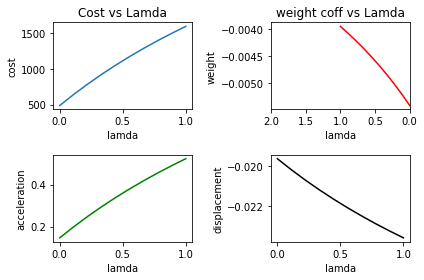

In [15]:
### Plotting all the graphs related to subject
#'Cost vs Lamda'
plt.subplot(2,2,1)
plt.plot(lamda_history,rmse_history)
plt.xlabel('lamda')
plt.ylabel('cost')
plt.title('Cost vs Lamda')
#weight coff vs Lamda
plt.subplot(2,2,2)
plt.plot(lamda_history,w[1],color='red')
plt.xlabel('lamda')
plt.ylabel('weight')
plt.title('weight coff vs Lamda')
plt.xlim(2, .0001)
#weight displaxement vs Lamda
plt.subplot(2,2,3)
plt.plot(lamda_history,w[2],color='green')
plt.xlabel('lamda')
plt.ylabel('acceleration')
#weight displacement vs Lamda
plt.subplot(2,2,4)
plt.plot(lamda_history,w[3],color='black')
plt.xlabel('lamda')
plt.ylabel('displacement')
plt.tight_layout()